In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import matplotlib. pylab as plt

In [3]:
# Load the dataset
dataset = pd.read_csv("E:\LiveProject\Supreme_court_judgement_Prediction\justice.csv",  delimiter=',', encoding = "utf8")

In [4]:
dataset. head()

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment


In [5]:
dataset. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3303 non-null   int64 
 1   ID                  3303 non-null   int64 
 2   name                3303 non-null   object
 3   href                3303 non-null   object
 4   docket              3303 non-null   object
 5   term                3303 non-null   object
 6   first_party         3302 non-null   object
 7   second_party        3302 non-null   object
 8   facts               3303 non-null   object
 9   facts_len           3303 non-null   int64 
 10  majority_vote       3303 non-null   int64 
 11  minority_vote       3303 non-null   int64 
 12  first_party_winner  3288 non-null   object
 13  decision_type       3296 non-null   object
 14  disposition         3231 non-null   object
 15  issue_area          3161 non-null   object
dtypes: int64(5), object(11)


In [6]:
dataset. isna(). sum()

Unnamed: 0              0
ID                      0
name                    0
href                    0
docket                  0
term                    0
first_party             1
second_party            1
facts                   0
facts_len               0
majority_vote           0
minority_vote           0
first_party_winner     15
decision_type           7
disposition            72
issue_area            142
dtype: int64

In [7]:
dataset. dropna(inplace = True)

In [8]:
dataset.drop(columns=['Unnamed: 0', 'docket','name','first_party','second_party', 'issue_area', 
                 'facts_len', 'majority_vote', 'minority_vote', 'href', 'ID','term'], inplace=True)

In [9]:
dataset. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3098 entries, 1 to 3302
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   facts               3098 non-null   object
 1   first_party_winner  3098 non-null   object
 2   decision_type       3098 non-null   object
 3   disposition         3098 non-null   object
dtypes: object(4)
memory usage: 121.0+ KB


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Clean text data
stop_words = set(stopwords.words('english'))

In [29]:
# Clean text data
def clean_text(text):
    # Remove special characters and symbols
    text = re.sub(r'[^a-zA-Z0-9\s<>]', '', text)
    # Remove <p> tags
    text = re.sub(r'<p>', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Join the tokens back into a single string
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text
    return text

In [30]:
dataset['clean_facts'] = dataset['facts'].apply(clean_text)

In [31]:
dataset

,facts,first_party_winner,decision_type,disposition,clean_facts
1,<p>Joan Stanley had three children with Peter ...,True,majority opinion,reversed/remanded,joan stanley three children peter stanley stan...
2,<p>John Giglio was convicted of passing forged...,True,majority opinion,reversed/remanded,john giglio convicted passing forged money ord...
3,"<p>The Idaho Probate Code specified that ""male...",True,majority opinion,reversed/remanded,idaho probate code specified males must prefer...
4,"<p>Miller, after conducting a mass mailing cam...",True,majority opinion,vacated/remanded,miller conducting mass mailing campaign advert...
5,<p>Ernest E. Mandel was a Belgian professional...,True,majority opinion,reversed,ernest e mandel belgian professional journalis...
...,...,...,...,...,...
3297,<p>For over a century after the Alaska Purchas...,True,majority opinion,reversed/remanded,century alaska purchase 1867 federal governmen...
3298,"<p>Refugio Palomar-Santiago, a Mexican nationa...",True,majority opinion,reversed/remanded,refugio palomarsantiago mexican national grant...
3299,<p>Tarahrick Terry pleaded guilty to one count...,False,majority opinion,affirmed,tarahrick terry pleaded guilty one count posse...
3300,<p>Joshua James Cooley was parked in his picku...,True,majority opinion,vacated/remanded,joshua james cooley parked pickup truck side r...


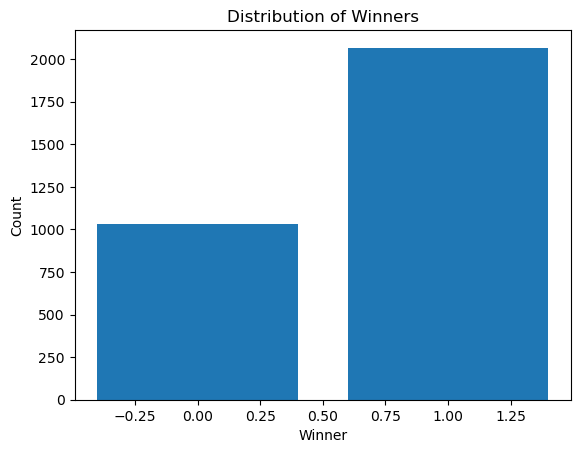

In [35]:
# Class distribution
class_counts = dataset['first_party_winner'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Winner')
plt.ylabel('Count')
plt.title('Distribution of Winners')
plt.show()

In [37]:
# Step 4: Feature Engineering
# Select relevant features for the prediction task
X = dataset['clean_facts']  # Use 'facts' column as input features
y = dataset['first_party_winner']  # Use 'first_party_winner' column as the target variable

In [38]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Step 6: Feature Extraction
# Apply text feature extraction techniques (e.g., TF-IDF) on the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [43]:
# Step 7: Encode Labels
# Encode the labels if they are not already encoded
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [44]:
# Step 7: Model Training
# Train a machine learning model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Step 8: Model Evaluation
# Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6774193548387096


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
# Train a machine learning model on the training data
model_rf = RandomForestClassifier(n_estimators=500, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [68]:
# Evaluate the model on the testing data
y_pred_rf = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.6806451612903226


In [69]:
import pickle
pickle. dump(model_rf,open("court_judgement.pickle", "wb"))

In [71]:
pickle. dump(vectorizer,open("vectorizer_court.pickle", "wb"))

In [61]:
# Step 9: Predict New Cases
# Use the trained model to make predictions on new, unseen data
new_cases = ["A criminal case involving charges of theft and fraud."]
new_cases_transformed = vectorizer.transform(new_cases)
predictions = model.predict(new_cases_transformed)
decoded_predictions = label_encoder.inverse_transform(predictions)

for case, prediction in zip(new_cases, decoded_predictions):
    if prediction == 1:
        print(case + ": True")
    else:
        print(case + ": False")

A criminal case involving charges of theft and fraud.: True
